<h1>Sales EDA

Combining the sales data from the different sources and performing EDA on the combined data.

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Code to Join the sheets to one dataframe

In [211]:
# Python
import pandas as pd
import os

# Directory where the Excel files are located
directory = 'datasets/Sales'

# List to store the dataframes
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".xlsx") or filename.endswith(".xls"):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        
        # Read the Excel file
        df = pd.read_excel(file_path)
        
        # Select the required columns
        df = df[['DATE', 'PRODUCT CODE', 'DESCRIPTION', 'QTY']]
        
        # Append the dataframe to the list
        dfs.append(df)

# Concatenate all dataframes
final_df = pd.concat(dfs, ignore_index=True)

In [212]:
final_df

,DATE,PRODUCT CODE,DESCRIPTION,QTY
0,02/01/2022,12978,AMBEWELA SET YOGURT 80ML,6.0
1,01/01/2022,12978,AMBEWELA SET YOGURT 80ML,6.0
2,01/01/2022,12978,AMBEWELA SET YOGURT 80ML,1.0
3,01/01/2022,12978,AMBEWELA SET YOGURT 80ML,6.0
4,02/01/2022,12978,AMBEWELA SET YOGURT 80ML,10.0
...,...,...,...,...
34627,09/10/2023,10415,HIGHLAND YOGHURT 80ML,12.0
34628,09/10/2023,10415,HIGHLAND YOGHURT 80ML,9.0
34629,09/10/2023,10415,HIGHLAND YOGHURT 80ML,13.0
34630,09/10/2023,10415,HIGHLAND YOGHURT 80ML,7.0


<h1><strong>EDA on the Sales Dataset<strong><h1>

<h2>1. Using .describe()</h2>

In [213]:
print(final_df.describe())# get a quick summary on the dataset from the quanitity values

       PRODUCT CODE           QTY
count  34632.000000  34632.000000
mean   14353.275930     11.285710
std     7934.239623     40.150993
min    10198.000000  -2160.000000
25%    10415.000000      1.000000
50%    10444.000000      3.000000
75%    12978.000000      8.000000
max    57096.000000   2875.000000


A total of 34632 products were sold. <br>
Product code 12974 has been the most frequently purchased products while 25% of the products purchased are of code 10415. Lets look into more detail

<h2>2. Check for missing values</h2>

In [214]:
missingValues = final_df.isna().sum().sum()
print(f'Total number of missing values: {missingValues}')

zero_quantity = final_df['QTY'] == 0
empty_description = final_df['DESCRIPTION'].isna()

total = (zero_quantity & empty_description).sum()
print(f'Total number of rows with zero quantity and empty description: {total}')

Total number of missing values: 0
Total number of rows with zero quantity and empty description: 0


There are no rows with missing values in the dataset. However, there are some negative values in the QTY column.

<h2>3. Convert the columns to correct date types</h2>

In [215]:
import pandas as pd


final_df['DATE'] = pd.to_datetime(final_df['DATE'], format='%d/%m/%Y')  # split the function to correct format

final_df['Day'] = final_df['DATE'].dt.day
final_df['Month'] = final_df['DATE'].dt.month
final_df['Year'] = final_df['DATE'].dt.year
final_df['DayOfWeek'] = final_df['DATE'].dt.day_name()

df

,DATE,PRODUCT CODE,DESCRIPTION,QTY
0,26/01/2022,10415,HIGHLAND YOGHURT 80ML,148
1,27/01/2022,10415,HIGHLAND YOGHURT 80ML,30
2,27/01/2022,10415,HIGHLAND YOGHURT 80ML,6
3,25/01/2022,10415,HIGHLAND YOGHURT 80ML,94
4,25/01/2022,10415,HIGHLAND YOGHURT 80ML,137
...,...,...,...,...
5776,09/10/2023,10415,HIGHLAND YOGHURT 80ML,12
5777,09/10/2023,10415,HIGHLAND YOGHURT 80ML,9
5778,09/10/2023,10415,HIGHLAND YOGHURT 80ML,13
5779,09/10/2023,10415,HIGHLAND YOGHURT 80ML,7


added new features such as splitting the date column to day/month/year and the dayoftheweek

In [216]:
final_df=final_df.drop(["PRODUCT CODE"],axis=1)

dropping product code as its not required

In [217]:
description = final_df["DESCRIPTION"]
description.nunique()## to get the number of different products

32

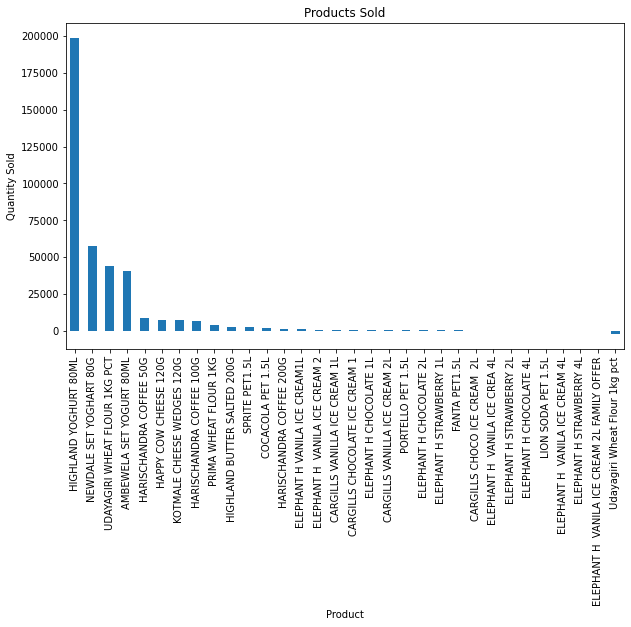

In [218]:

top_products = final_df.groupby('DESCRIPTION')['QTY'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Products Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

Highland youghurt has been sold frequently. there are spelling mistakes in the dataset we have to fix this

<h2>4. Cleaning data </h2>

<AxesSubplot:>

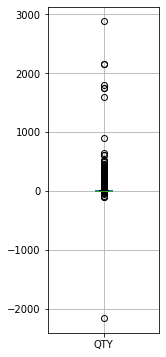

In [219]:
negative_values = final_df[(final_df['QTY'] <= 0)]
final_df.boxplot(column=['QTY'], figsize=(2, 6))

There are some outliers and incorrect data for quanitity, some of them are less than zero. and one product is less than -2000

the wheat flour product has -2160 as the quanitiy sold on that day

In [220]:
final_df.drop(final_df[final_df['QTY'] <= 0].index, inplace=True)


Now the QTY column is fixed, have to fix the descriptions

In [221]:
# before doing that we gotto split the description based on the product name and quantity
final_df[['Product Name', 'Product Quantity']] = final_df['DESCRIPTION'].str.rsplit(' ', n=1, expand=True)
final_df["Date"] =final_df["DATE"]
final_df["Units sold"]=final_df["QTY"]
final_df.drop(["DATE","DESCRIPTION","QTY"],axis=1,inplace=True)
final_df

,Day,Month,Year,DayOfWeek,Product Name,Product Quantity,Date,Units sold
0,2,1,2022,Sunday,AMBEWELA SET YOGURT,80ML,2022-01-02,6.0
1,1,1,2022,Saturday,AMBEWELA SET YOGURT,80ML,2022-01-01,6.0
2,1,1,2022,Saturday,AMBEWELA SET YOGURT,80ML,2022-01-01,1.0
3,1,1,2022,Saturday,AMBEWELA SET YOGURT,80ML,2022-01-01,6.0
4,2,1,2022,Sunday,AMBEWELA SET YOGURT,80ML,2022-01-02,10.0
...,...,...,...,...,...,...,...,...
34627,9,10,2023,Monday,HIGHLAND YOGHURT,80ML,2023-10-09,12.0
34628,9,10,2023,Monday,HIGHLAND YOGHURT,80ML,2023-10-09,9.0
34629,9,10,2023,Monday,HIGHLAND YOGHURT,80ML,2023-10-09,13.0
34630,9,10,2023,Monday,HIGHLAND YOGHURT,80ML,2023-10-09,7.0


Convert the units sold to an integer and rearrange the columns

In [222]:
final_df["Units sold"] = final_df["Units sold"].astype(int)
final_df = final_df[["Date", "Product Name", "Product Quantity", "Units sold", "Day", "Month", "Year", "DayOfWeek"]]
final_df

,Date,Product Name,Product Quantity,Units sold,Day,Month,Year,DayOfWeek
0,2022-01-02,AMBEWELA SET YOGURT,80ML,6,2,1,2022,Sunday
1,2022-01-01,AMBEWELA SET YOGURT,80ML,6,1,1,2022,Saturday
2,2022-01-01,AMBEWELA SET YOGURT,80ML,1,1,1,2022,Saturday
3,2022-01-01,AMBEWELA SET YOGURT,80ML,6,1,1,2022,Saturday
4,2022-01-02,AMBEWELA SET YOGURT,80ML,10,2,1,2022,Sunday
...,...,...,...,...,...,...,...,...
34627,2023-10-09,HIGHLAND YOGHURT,80ML,12,9,10,2023,Monday
34628,2023-10-09,HIGHLAND YOGHURT,80ML,9,9,10,2023,Monday
34629,2023-10-09,HIGHLAND YOGHURT,80ML,13,9,10,2023,Monday
34630,2023-10-09,HIGHLAND YOGHURT,80ML,7,9,10,2023,Monday


Convert the product quanitity to correct metrics ex L,ML,G,KG

In [223]:
# Python
final_df['Product Quantity'] = final_df['Product Quantity'].replace('PET1.5L', '1.5L')

In [224]:
final_df[final_df["Product Quantity"]=="PCT"]
final_df['Product Quantity'] = final_df['Product Quantity'].replace('PCT', '1KG')

In [225]:
final_df[final_df["Product Quantity"]=="OFFER"]
final_df['Product Quantity'] = final_df['Product Quantity'].replace('OFFER', '2L')

In [226]:
final_df[final_df["Product Quantity"]=="CREAM1L"]
final_df['Product Quantity'] = final_df['Product Quantity'].replace('CREAM1L', '1L')

In [227]:
# Python
mask = (final_df['Product Name'] == 'CARGILLS CHOCOLATE ICE CREAM') & (final_df['Product Quantity'] == '1')
final_df.loc[mask, 'Product Quantity'] = '1L'

In [228]:
final_df[final_df['Product Quantity'] == '2']["Product Name"].unique()

array(['ELEPHANT H  VANILA ICE CREAM'], dtype=object)

In [229]:
mask = (final_df['Product Name'] == 'ELEPHANT H  VANILA ICE CREAM') & (final_df['Product Quantity'] == '2')
final_df.loc[mask, 'Product Quantity'] = '2L'

The Quantity columns have been cleaned now have to fix the product name

In [274]:
final_df["Product Name"].unique()

array(['AMBEWELA SET YOGHURT', 'HIGHLAND BUTTER SALTED',
       'CARGILLS CHOCOLATE ICE CREAM', 'CARGILLS VANILLA ICE CREAM',
       'ELEPHANT HOUSE CHOCOALTE ICE CREAM', 'COCACOLA', 'FANTA',
       'HAPPY COW CHEESE', 'HARISCHANDRA COFFEE', 'KOTMALE CHEESE WEDGES',
       'LION SODA', 'NEWDALE SET YOGHURT', 'PORTELLO',
       'PRIMA WHEAT FLOUR', 'SPRITE',
       'ELEPHANT HOUSE STRAWBERRY ICE CREAM', 'UDAYAGIRI WHEAT FLOUR',
       'ELEPHANT HOUSE VANILA ICE CREAM', 'HIGHLAND YOGHURT'],
      dtype=object)

In [231]:
final_df["Product Name"] = final_df["Product Name"].replace("AMBEWELA SET YOGURT","AMBEWELA SET YOGHURT")
final_df["Product Name"] = final_df["Product Name"].replace("NEWDALE SET YOGHART","NEWDALE SET YOGHURT")

In [237]:
final_df["Product Name"] = final_df["Product Name"].replace("CARGILLS CHOCO ICE CREAM","CARGILLS CHOCOLATE ICE CREAM")
final_df["Product Name"] = final_df["Product Name"].replace("COCACOLA PET","COCACOLA")
final_df["Product Name"] = final_df["Product Name"].replace("LION SODA PET","LION SODA")
final_df["Product Name"] = final_df["Product Name"].replace("PORTELLO PET","PORTELLO")
final_df["Product Name"] = final_df["Product Name"].replace("UDAYAGIRI WHEAT FLOUR 1KG","UDAYAGIRI WHEAT FLOUR")
final_df["Product Name"] = final_df["Product Name"].replace("ELEPHANT H VANILA ICE","ELEPHANT HOUSE VANILA ICECREAM")
final_df["Product Name"] = final_df["Product Name"].replace("ELEPHANT H  VANILA ICE CREAM 2L FAMILY","ELEPHANT HOUSE VANILA ICECREAM")
final_df["Product Name"] = final_df["Product Name"].replace("CARGILLS CHOCO ICE CREAM ","CARGILLS CHOCOLATE ICE CREAM")
final_df["Product Name"] = final_df["Product Name"].replace("ELEPHANT HOUSE VANILA ICECREAM","ELEPHANT HOUSE VANILA ICE CREAM")
final_df["Product Name"] = final_df["Product Name"].replace("ELEPHANT H CHOCOLATE","ELEPHANT HOUSE CHOCOLATE")
final_df["Product Name"] = final_df["Product Name"].replace("ELEPHANT H STRAWBERRY","ELEPHANT HOUSE STRAWBERRY")
final_df["Product Name"] = final_df["Product Name"].replace("ELEPHANT H  VANILA ICE CREAM","ELEPHANT HOUSE VANILA ICE CREAM")
final_df["Product Name"] = final_df["Product Name"].replace("ELEPHANT H  VANILA ICE CREA","ELEPHANT HOUSE VANILA ICE CREAM")
final_df["Product Name"] = final_df["Product Name"].replace("ELEPHANT HOUSE CHOCOLATE","ELEPHANT HOUSE CHOCOALTE ICE CREAM")
final_df["Product Name"] = final_df["Product Name"].replace("ELEPHANT HOUSE STRAWBERRY","ELEPHANT HOUSE STRAWBERRY ICE CREAM")

Product Name is cleaned

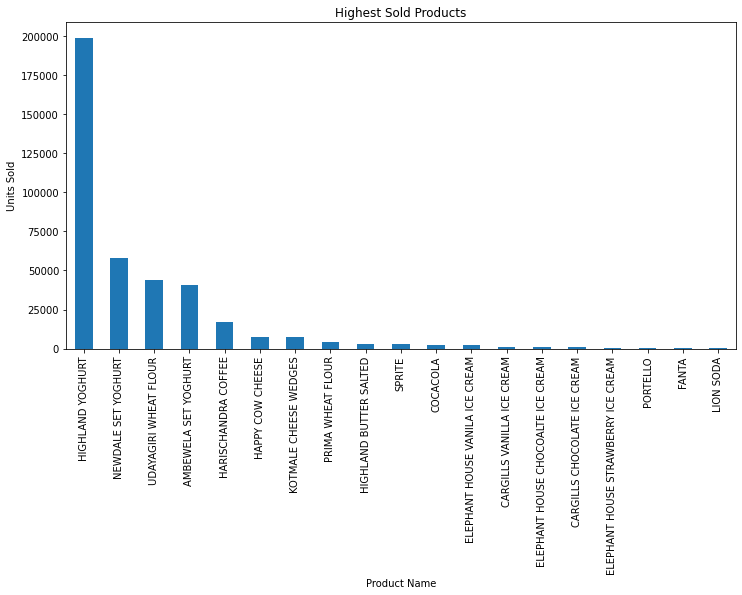

In [244]:
# Python
import matplotlib.pyplot as plt

# Group by 'Product Name' and get the total units sold for each product
product_sales = final_df.groupby('Product Name')['Units sold'].sum()

# Sort the data in descending order
product_sales = product_sales.sort_values(ascending=False)

# Plot the data
product_sales.plot(kind='bar', figsize=(12, 6))

plt.title('Highest Sold Products')
plt.xlabel('Product Name')
plt.ylabel('Units Sold')

plt.show()

<h2>5. Additional Features </h2>

Create column called category

In [270]:
df=final_df
df['Category'] = df['Product Name'].apply(lambda x: 'FLOUR' if 'FLOUR' in x else (
    'ICE CREAM' if 'ICE CREAM' in x else (
        'COLD BEVERAGE' if any(keyword in x for keyword in ['LION SODA', 'FANTA', 'PORTELLO', 'SPRITE', 'COCACOLA']) else (
            'COFFEE' if 'COFFEE' in x else (
                'BUTTER' if 'BUTTER' in x else (
                    'CHEESE' if 'CHEESE' in x else (
                        'YOGHURT' if 'YOGHURT' in x else None
                    )
                )
            )
        )
    )
))
final_df=df

In [269]:
final_df.drop("Category",axis=1,inplace=True)

In [271]:
final_df['Category'].unique()

array(['YOGHURT', 'BUTTER', 'ICE CREAM', 'COLD BEVERAGE', 'CHEESE',
       'COFFEE', 'FLOUR'], dtype=object)

Saving the sales data

In [304]:
final_df.to_csv('Sales_Data.csv', index=False)


<h2>EDA</h2>

<h2>Products vs Categories

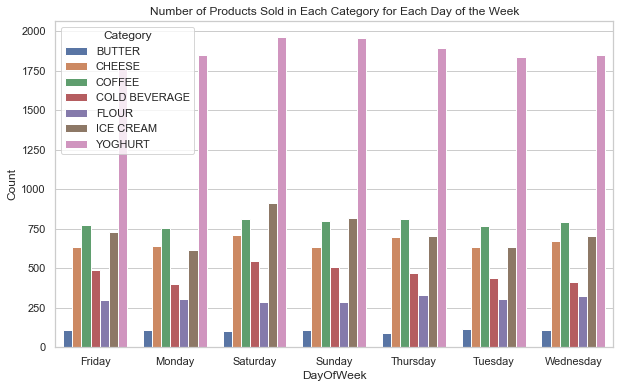

In [282]:
category_counts = df.groupby(['DayOfWeek', 'Category']).size().reset_index(name='Count')

# Plot the bar graph
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Count', hue='Category', data=category_counts)
plt.title('Number of Products Sold in Each Category for Each Day of the Week')
plt.show()

We can see that there are slight fluctuations however youghurt is being sold on mostly every day at a higer quanitiy

Based on each day

<h2> Demand comparison for each day

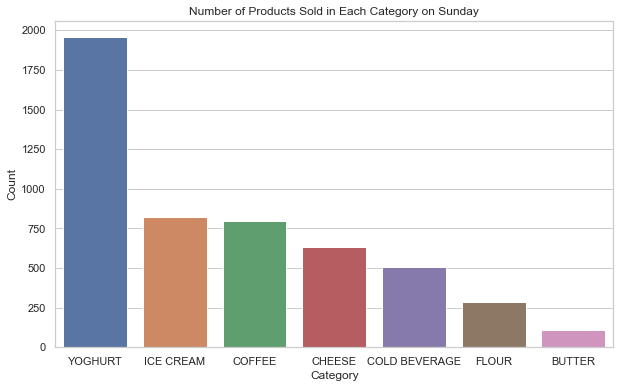

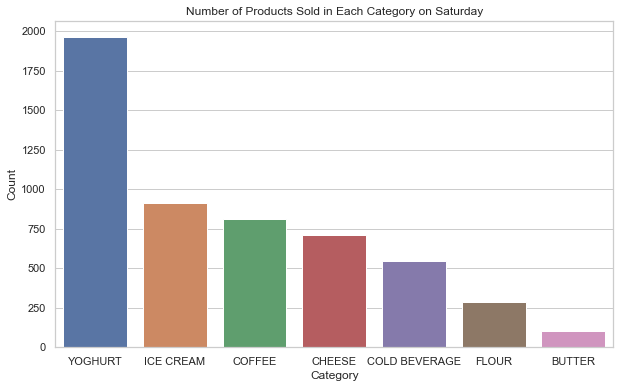

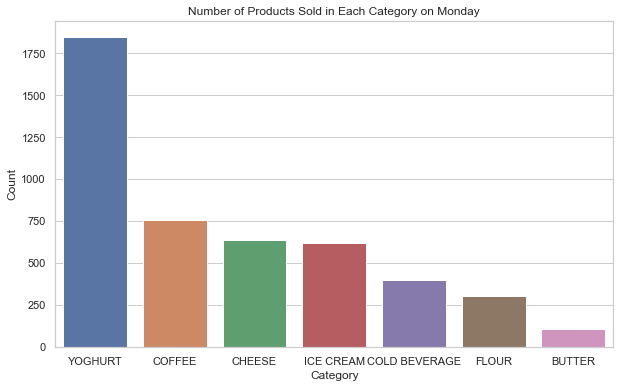

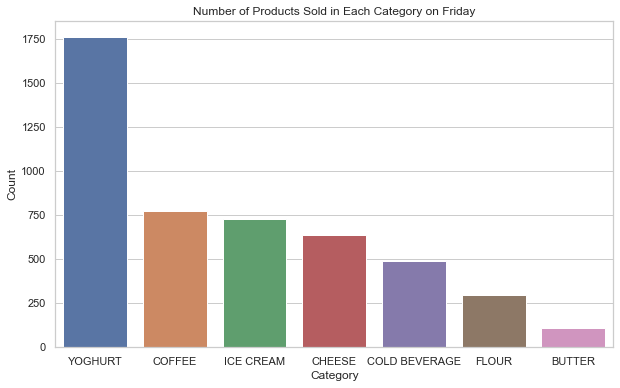

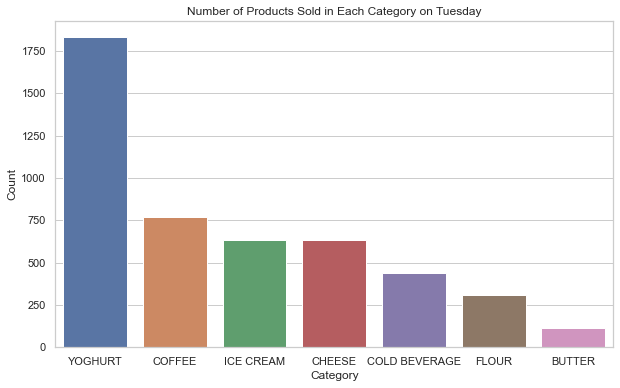

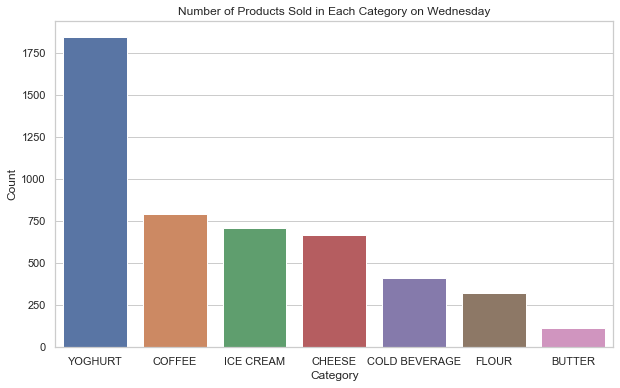

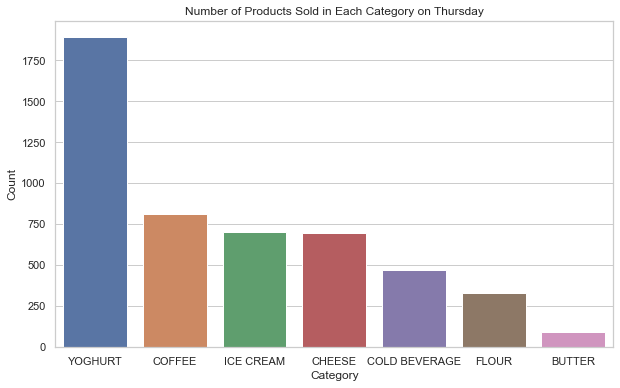

In [289]:
days_of_week = final_df['DayOfWeek'].unique()

# Plot a bar graph for each day of the week
for day in days_of_week:
    # Filter the DataFrame for the current day
    day_data = final_df[final_df['DayOfWeek'] == day]
    
    # Count the number of products sold in each category for the current day
    category_counts_day = day_data['Category'].value_counts().reset_index(name='Count')
    
    # Plot the bar graph
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Category', y='Count', data=category_counts_day)
    plt.title(f'Number of Products Sold in Each Category on {day}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

Compare Between weekend and weekdays

Ice cream has a slightly higher demand during the weekend compare to Coffee

This overview may not be enough therfore lets take a look at the demand for each product over the weekCompare

In [1]:
import pandas as pd
df= pd.read_csv("Sales_Data.csv")

<h2> Product vs Unit Sold

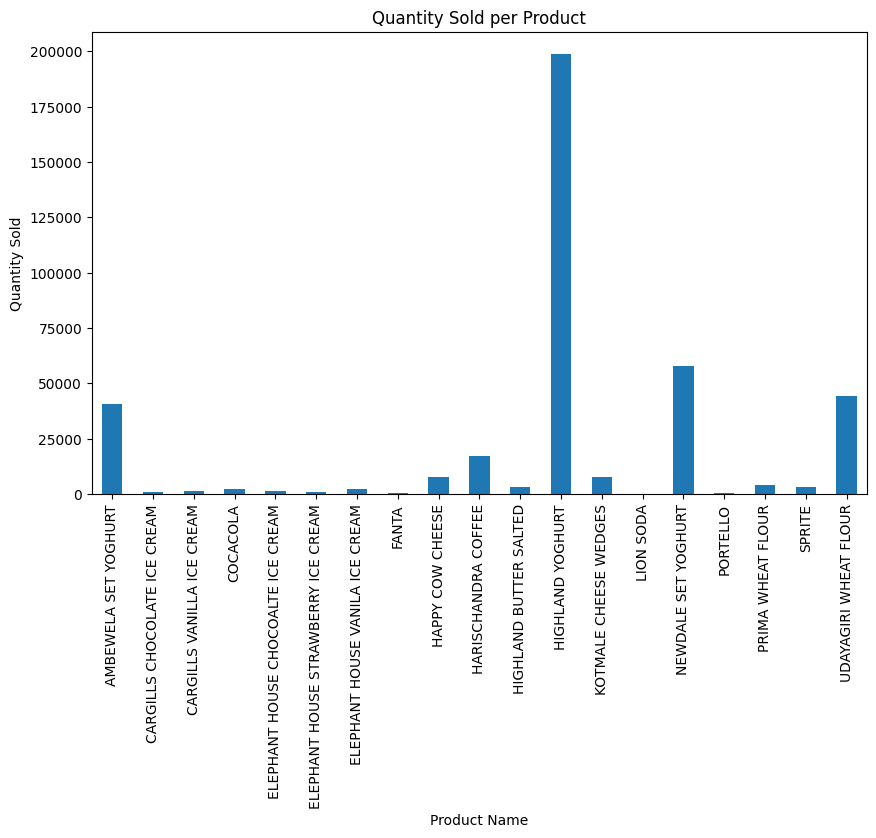

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has columns 'product_name' and 'quantity_sold'

grouped_data = df.groupby('Product Name')['Units sold'].sum()

plt.figure(figsize=(10,6))
grouped_data.plot(kind='bar')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold per Product')
plt.show()

Demand for highland youghurt is higher compared to ambewela and newdale set youghurt

<h2> Pair Plot

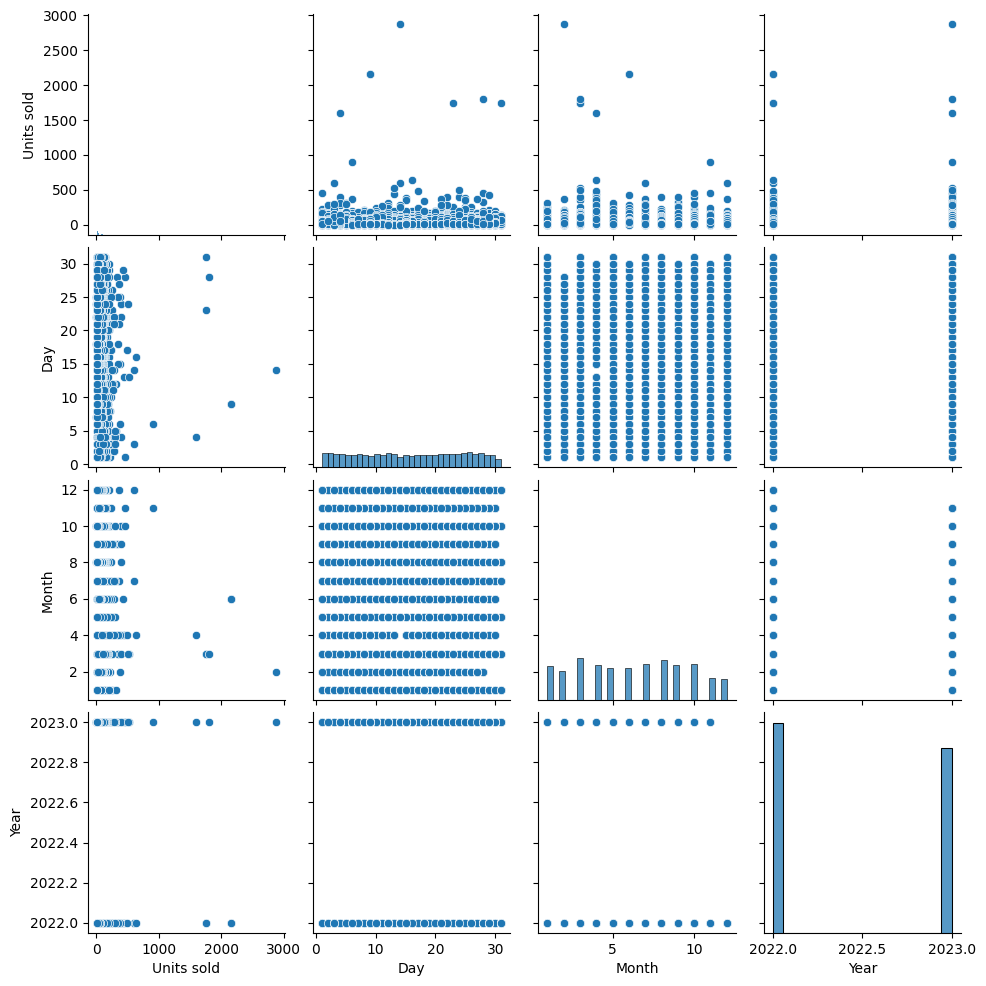

In [10]:
import seaborn as sns
sns.pairplot(df)

<h2>Total Units sold vs the day of the week

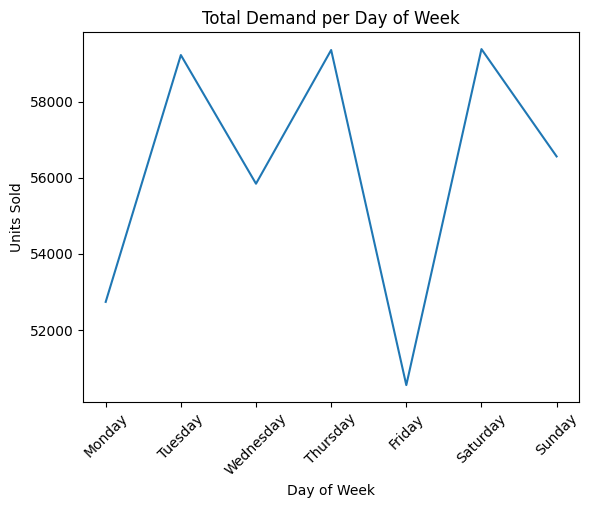

DayOfWeek
Monday       52739
Tuesday      59227
Wednesday    55845
Thursday     59359
Friday       50552
Saturday     59383
Sunday       56562
Name: Units sold, dtype: int64


In [26]:
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has columns 'DayOfWeek' and 'Units sold'
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

grouped_data = df.groupby('DayOfWeek')['Units sold'].sum()

plt.plot(grouped_data)
plt.xlabel('Day of Week')
plt.ylabel('Units Sold')
plt.title('Total Demand per Day of Week')
plt.xticks(rotation=45)
plt.show()

print(grouped_data)


Saturday Thursday and Tuesday have higher demands while Friday has the least number of units sold

In [11]:
import pandas as pd
df =pd.read_csv("Sales_Data.csv")
df

,Date,Product Name,Product Quantity,Units sold,Day,Month,Year,DayOfWeek,Category,DayType
0,2022-01-02,AMBEWELA SET YOGHURT,80ML,6,2,1,2022,Sunday,YOGHURT,Weekend
1,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend
2,2022-01-01,AMBEWELA SET YOGHURT,80ML,1,1,1,2022,Saturday,YOGHURT,Weekend
3,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend
4,2022-01-02,AMBEWELA SET YOGHURT,80ML,10,2,1,2022,Sunday,YOGHURT,Weekend
...,...,...,...,...,...,...,...,...,...,...
34519,2023-10-09,HIGHLAND YOGHURT,80ML,12,9,10,2023,Monday,YOGHURT,Weekday
34520,2023-10-09,HIGHLAND YOGHURT,80ML,9,9,10,2023,Monday,YOGHURT,Weekday
34521,2023-10-09,HIGHLAND YOGHURT,80ML,13,9,10,2023,Monday,YOGHURT,Weekday
34522,2023-10-09,HIGHLAND YOGHURT,80ML,7,9,10,2023,Monday,YOGHURT,Weekday


Feature Engineering 

In [12]:
import pandas as pd
weather = pd.read_csv("/Users/hammaad/Downloads/Colombo Rf.xlsx - Sheet1.csv")
weather.tail()

,Year,Month,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
16,2023,5,38.1,32.7,33.4,70.4,12.0,3.1,1.7,5.3,...,0.0,0.1,0.0,0.0,4.9,3.9,0.1,3.5,7.5,0.0
17,2023,6,1.4,9.0,0.1,2.0,3.4,0.7,3.6,1.8,...,0.0,0.0,0.4,3.6,12.1,1.3,2.0,1.7,0.0,NaN
18,2023,7,1.3,6.1,2.9,6.2,32.7,0.0,0.8,0.0,...,0.0,6.2,2.2,32.8,0.1,0.0,0.0,0.0,0.0,0.0
19,2023,8,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,...,0.1,0.0,6.5,0.0,3.4,0.1,6.5,6.1,17.3,40.5
20,2023,9,33.1,74.3,48.7,13.4,12.6,36.2,30.7,0.7,...,20.9,1.0,3.0,4.6,18.4,42.4,63.4,60.3,29.6,NaN


In [13]:
weather[weather["Year"]==(2022)]


,Year,Month,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,2022,1,0.1,7.6,7.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,58.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.3,1.3,0.8,3.1,0.0,0.0,NaN,NaN,NaN
2,2022,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0
3,2022,4,0.2,0.0,1.5,0.0,4.5,0.0,45.2,22.9,...,10.8,0.1,0.0,4.4,0.0,71.1,0.5,13.3,12.6,NaN
4,2022,5,3.5,0.4,0.0,0.4,48.3,4.2,0.0,0.0,...,2.3,0.0,11.1,10.8,43.6,1.0,8.5,16.1,47.0,56.2
5,2022,6,1.2,9.5,1.7,4.8,0.2,0.0,0.5,1.7,...,10.0,0.4,3.3,1.8,0.0,0.0,0.0,0.0,0.0,NaN
6,2022,7,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,...,1.1,0.0,0.0,0.0,0.0,2.0,0.2,0.7,0.0,0.0
7,2022,8,1.1,3.8,14.5,12.1,15.6,0.3,0.0,0.8,...,1.1,0.0,0.0,0.0,3.9,0.0,0.0,0.3,21.6,35.2
8,2022,9,2.8,2.5,3.5,59.0,13.6,0.2,3.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0.1,5.3,3.8,NaN
9,2022,10,3.8,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,68.2,44.3,0.1,4.7,6.6,0.0,0.0,1.0,0.0,5.0


Adding the rainfall for each day 

In [14]:
rotatedWeather = weather.transpose()
rotatedWeather = rotatedWeather.iloc[1:,:]
rotatedWeather.drop("Month",axis=0,inplace=True)

In [15]:
# Generate list of date strings assuming each month has 31 days
date_strings = []

# Loop for 2022
for year in range(2022, 2023):
    for month in range(1, 13):
        for day in range(1, 32):
            date_strings.append(f"{year:04d}-{month:02d}-{day:02d}")

# Loop for 2023 (up to September)
for year in range(2023, 2024):
    for month in range(1, 10):
        for day in range(1, 32):
            date_strings.append(f"{year:04d}-{month:02d}-{day:02d}")

len(date_strings)


651

In [16]:
monthsHorizontal=[]

for i in range(len(rotatedWeather.columns)):
    for j in range(len(rotatedWeather[i])):
        monthsHorizontal.append(rotatedWeather[i][j])


In [17]:
import pandas as pd
rainfall_data = pd.DataFrame({
    'Date': date_strings,
    'Rainfall': monthsHorizontal
})
rainfall_data

,Date,Rainfall
0,2022-01-01,0.1
1,2022-01-02,7.6
2,2022-01-03,7.3
3,2022-01-04,0.0
4,2022-01-05,0.0
...,...,...
646,2023-09-27,42.4
647,2023-09-28,63.4
648,2023-09-29,60.3
649,2023-09-30,29.6


merging both sales and rainfall dataframe

In [31]:
import pandas as pd
sales_df = df.merge(rainfall_data[['Date', 'Rainfall']], on='Date', how='left')
sales_df.head()


,Date,Product Name,Product Quantity,Units sold,Day,Month,Year,DayOfWeek,Category,DayType,Rainfall
0,2022-01-02,AMBEWELA SET YOGHURT,80ML,6,2,1,2022,Sunday,YOGHURT,Weekend,7.6
1,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.1
2,2022-01-01,AMBEWELA SET YOGHURT,80ML,1,1,1,2022,Saturday,YOGHURT,Weekend,0.1
3,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.1
4,2022-01-02,AMBEWELA SET YOGHURT,80ML,10,2,1,2022,Sunday,YOGHURT,Weekend,7.6


Normalise the rainfall value

In [32]:
# Assuming sales_df is your DataFrame and it has a column 'Rainfall'
sales_df['Rainfall'] = (sales_df['Rainfall'] - sales_df['Rainfall'].min()) / (sales_df['Rainfall'].max() - sales_df['Rainfall'].min())

In [33]:
sales_df

,Date,Product Name,Product Quantity,Units sold,Day,Month,Year,DayOfWeek,Category,DayType,Rainfall
0,2022-01-02,AMBEWELA SET YOGHURT,80ML,6,2,1,2022,Sunday,YOGHURT,Weekend,0.060849
1,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801
2,2022-01-01,AMBEWELA SET YOGHURT,80ML,1,1,1,2022,Saturday,YOGHURT,Weekend,0.000801
3,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801
4,2022-01-02,AMBEWELA SET YOGHURT,80ML,10,2,1,2022,Sunday,YOGHURT,Weekend,0.060849
...,...,...,...,...,...,...,...,...,...,...,...
34519,2023-10-09,HIGHLAND YOGHURT,80ML,12,9,10,2023,Monday,YOGHURT,Weekday,NaN
34520,2023-10-09,HIGHLAND YOGHURT,80ML,9,9,10,2023,Monday,YOGHURT,Weekday,NaN
34521,2023-10-09,HIGHLAND YOGHURT,80ML,13,9,10,2023,Monday,YOGHURT,Weekday,NaN
34522,2023-10-09,HIGHLAND YOGHURT,80ML,7,9,10,2023,Monday,YOGHURT,Weekday,NaN


In [34]:
# Assuming df is your DataFrame and it has a column 'Date'
# Assuming sales_df is your DataFrame and it has a column 'Date'
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Week_of_Year'] = sales_df['Date'].dt.isocalendar().week

sales_df

,Date,Product Name,Product Quantity,Units sold,Day,Month,Year,DayOfWeek,Category,DayType,Rainfall,Week_of_Year
0,2022-01-02,AMBEWELA SET YOGHURT,80ML,6,2,1,2022,Sunday,YOGHURT,Weekend,0.060849,52
1,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
2,2022-01-01,AMBEWELA SET YOGHURT,80ML,1,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
3,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
4,2022-01-02,AMBEWELA SET YOGHURT,80ML,10,2,1,2022,Sunday,YOGHURT,Weekend,0.060849,52
...,...,...,...,...,...,...,...,...,...,...,...,...
34519,2023-10-09,HIGHLAND YOGHURT,80ML,12,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34520,2023-10-09,HIGHLAND YOGHURT,80ML,9,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34521,2023-10-09,HIGHLAND YOGHURT,80ML,13,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34522,2023-10-09,HIGHLAND YOGHURT,80ML,7,9,10,2023,Monday,YOGHURT,Weekday,NaN,41


In [35]:
sales_df.to_csv('Sales_Data.csv', index=False)